# Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?

## Ans:

In machine learning algorithms, especially in the context of Support Vector Machines (SVMs), the relationship between polynomial functions and kernel functions is significant. Kernel functions play a crucial role in SVMs as they allow the algorithm to operate in a higher-dimensional space without explicitly calculating the transformed feature vectors. Polynomial functions are a specific type of kernel function.

Kernel Functions:

Definition: In the context of SVMs, a kernel function is a mathematical function that computes the similarity or inner product of two feature vectors in a higher-dimensional space.
Role: Kernels enable SVMs to efficiently operate in high-dimensional spaces without explicitly computing the coordinates of the data points in that space. This is known as the "kernel trick."
Polynomial Kernel:

Definition: The polynomial kernel is a specific type of kernel function. It computes the similarity between two vectors in terms of the polynomial expansion of their inner product.
    Formula: For two vectors x and y, the polynomial kernel of degree d is defined as `K(x,y)=x⋅y+c)^d`
   
where:

c is a user-defined constant.
Relationship:

Transformation to Higher-Dimensional Space: Polynomial kernel implicitly performs a nonlinear transformation of the input data into a higher-dimensional space.
Equivalent Polynomial Feature Mapping: The polynomial kernel can be viewed as implicitly applying a polynomial feature mapping to the original feature space without explicitly computing the transformed feature vectors.
Other Kernel Functions:

Radial Basis Function (RBF) Kernel: Another commonly used kernel is the RBF kernel (or Gaussian kernel). It is often used for capturing non-linear relationships between data points.
Sigmoid Kernel: The sigmoid kernel is another example, simulating a neural network's activation function.
Choice of Kernel:

Task-Specific: The choice of kernel depends on the nature of the data and the specific task. Polynomial kernels are useful when the decision boundary is best represented by polynomial functions.
In summary, polynomial functions are a specific type of kernel function used in SVMs. The relationship lies in the fact that kernel functions, including polynomial kernels, facilitate the implicit transformation of data into higher-dimensional spaces, allowing SVMs to effectively handle non-linear decision boundaries in the original feature space.

# Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

## Ans:


To implement an SVM with a polynomial kernel in Python using Scikit-learn, you can use the SVC (Support Vector Classification) class and specify the kernel type as 'poly'. Here's a simple example using a polynomial kernel:

Accuracy of SVM with Polynomial Kernel: 0.83


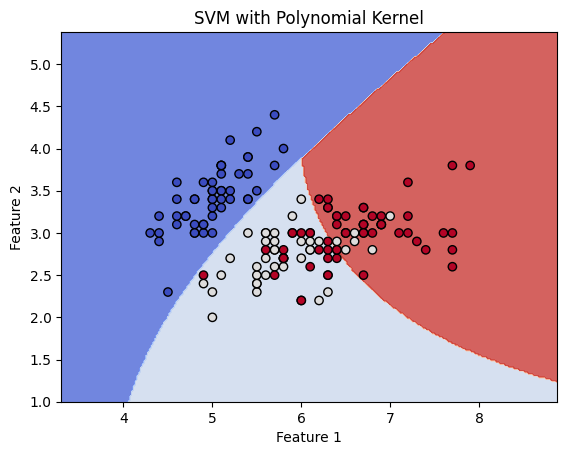

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting the first two features for simplicity
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an SVM with a polynomial kernel
# You can specify the degree of the polynomial using the 'degree' parameter
# The 'C' parameter controls the regularization strength
poly_svm = SVC(kernel='poly', degree=3, C=1.0)
poly_svm.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = poly_svm.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM with Polynomial Kernel: {accuracy:.2f}")

# Plot decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = poly_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title("SVM with Polynomial Kernel")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In this example, kernel='poly' specifies the use of a polynomial kernel, and degree=3 specifies the degree of the polynomial. You can adjust the degree parameter based on the complexity of the relationships in your data. The C parameter controls the regularization strength.

Feel free to experiment with different values of the degree and C parameters to observe their impact on the SVM with a polynomial kernel.

# Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

## Ans: 

In Support Vector Regression (SVR), epsilon (also denoted as ε) is a parameter that defines the width of the margin or the tube around the regression line within which errors are tolerated. Specifically, SVR aims to fit a hyperplane in a high-dimensional space such that the majority of data points fall within the tube defined by ε. Points outside this tube contribute to the model's loss, and the goal is to minimize this loss.

The role of epsilon in SVR and its impact on the number of support vectors is as follows:

- Width of the Tube (ε):

    - When epsilon is small, the tube is narrow, and the algorithm is less tolerant of errors. This can lead to a more accurate fit to the training data but may result in fewer data points being considered support vectors.
    - When epsilon is large, the tube is wider, and the algorithm is more tolerant of errors. This can lead to a more flexible fit that allows more data points to be considered support vectors.

- Impact on Support Vectors:

    - Support vectors are data points that lie on the margin or within the tube. They play a crucial role in determining the regression function.
    - As epsilon increases, allowing for a wider tube, more data points may fall within the tube, and thus, more points might be considered support vectors.

- Regularization Effect:

    - Epsilon acts as a regularization parameter in SVR. Smaller values of epsilon result in a more constrained model, while larger values allow for a more flexible model.
    - A smaller epsilon might lead to a model that closely follows the training data but may not generalize well to new data.
    - A larger epsilon introduces more flexibility, allowing the model to capture a broader range of patterns in the data.

- Trade-off:

    - The choice of epsilon involves a trade-off between accuracy on the training data and the model's ability to generalize to unseen data.
    - It's essential to tune epsilon along with other hyperparameters to achieve a balance that meets the specific requirements of the problem.
    
In summary, increasing the value of epsilon in SVR generally results in a wider tube, making the model more tolerant of errors. This, in turn, may lead to more data points being considered support vectors. However, the optimal choice of epsilon depends on the characteristics of the data and the desired trade-off between model accuracy and generalization.

# Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?

## Ans: 


Support Vector Regression (SVR) is a machine learning algorithm used for regression tasks. The performance of SVR is influenced by several parameters, including the choice of kernel function, C parameter, epsilon parameter (ε), and gamma parameter (γ). Let's discuss each parameter and its impact on SVR performance:

- Kernel Function:

    - Purpose: Kernels define the type of mathematical function used to map input features into a higher-dimensional space.

    - Types:
        - Linear Kernel (default): Suitable for linear relationships between features.
        - Radial Basis Function (RBF) Kernel: Suitable for capturing non-linear relationships. Parameter γ plays a significant role.
        - Polynomial Kernel: Suitable for polynomial relationships. Parameters degree and coef0 are important.

- C Parameter:

    - Purpose: C is the regularization parameter that controls the trade-off between achieving a low training error and a smooth decision function.
    - Effect of Increasing C:
        - Larger C values result in a more accurate fit to the training data.
        - The model becomes less tolerant of errors, and the margin is narrower.
        - May lead to overfitting if C is excessively large.

    - Effect of Decreasing C:

        - Smaller C values result in a smoother decision function.
        - The model is more tolerant of errors, and the margin is wider.
        - May lead to underfitting if C is excessively small.
 
- Epsilon Parameter (ε):

    - Purpose: Epsilon defines the width of the tube around the regression line within which errors are tolerated.
    - Effect of Increasing Epsilon:
        - Larger epsilon results in a wider tube, making the model more tolerant of errors.
        - More data points may be considered support vectors.
        - Increases model flexibility.

    - Effect of Decreasing Epsilon:
        - Smaller epsilon results in a narrower tube, making the model less tolerant of errors.
        - Fewer data points may be considered support vectors.
        - Leads to a more constrained model.
- Gamma Parameter (γ):

    - Purpose: Gamma defines how far the influence of a single training example reaches.
    - Effect of Increasing Gamma:
        - Larger gamma values lead to a narrower Gaussian (RBF) kernel.
        - The model is more sensitive to local variations in the data.
        - May result in overfitting if gamma is excessively large.
    
    - Effect of Decreasing Gamma:
        - Smaller gamma values lead to a broader Gaussian (RBF) kernel.
        - The model captures more global patterns in the data.
        - May result in underfitting if gamma is excessively small.
- Example Scenarios:

    - Use an RBF kernel (with varying gamma) when dealing with non-linear relationships in the data.
    - Adjust C based on the desired balance between fitting the training data and generalization.
    - Tune epsilon to control the width of the tube based on the tolerance for errors.
    
It's crucial to perform hyperparameter tuning using techniques like grid search or randomized search to find the optimal combination of parameters for a specific dataset. The optimal values often depend on the characteristics of the data and the nature of the underlying relationship. Regularization parameters (C, epsilon) and kernel parameters (gamma, degree) should be chosen carefully to achieve the right balance between bias and variance in the model.

# Q5. Assignment:
- Import the necessary libraries and load the dataset
- Split the dataset into training and testing set
- Preprocess the data using any technique of your choice (e.g. scaling, normalization)
- Create an instance of the SVC classifier and train it on the training data
- hse the trained classifier to predict the labels of the testing data
- Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,precision, recall, F1-score)
- Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to improve its performance
- Train the tuned classifier on the entire dataset
- Save the trained classifier to a file for future use.

In [4]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import joblib

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVC classifier and train it on the training data
classifier = SVC()
classifier.fit(X_train_scaled, y_train)

# Use the trained classifier to predict the labels of the testing data
y_pred = classifier.predict(X_test_scaled)

# Evaluate the performance of the classifier using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Tune hyperparameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Accuracy: 1.00
Best Hyperparameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}


In [7]:
# Train the tuned classifier on the entire dataset
tuned_classifier = SVC(**best_params)
tuned_classifier.fit(X_train_scaled, y_train)  # Use the scaled training data

SVC(C=0.1, gamma=0.01, kernel='linear')

In [8]:
# Save the trained classifier to a file for future use
joblib.dump(tuned_classifier, 'svm_model.joblib')

['svm_model.joblib']